| **Inicio** | **atrás 13** | **Siguiente 15** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./13.Arboles%20_Decision.ipynb)| [⏩](./15.DBSCAN_Clustering.ipynb)|

# **14. Random Forest (Bosque Aleatorio) para Clasificación con Python**

## **Introducción**

![arbol](../imagenes%20Machine_Learning/arbol.png "arbol")

Random Forest es un algoritmo de aprendizaje supervisado que se utiliza para clasificar datos en múltiples categorías. Es una técnica que combina múltiples árboles de decisión en un modelo, donde cada árbol se ajusta a un subconjunto aleatorio de las características y se entrena con un subconjunto aleatorio de los datos. Los resultados de cada árbol se promedian para obtener la clasificación final.

Random Forest es una técnica de ensamblaje de modelos que mejora la precisión y la estabilidad del modelo en comparación con un solo árbol de decisión. También puede reducir el riesgo de sobreajuste (overfitting) que puede ocurrir en un solo árbol.

Un ejemplo de Random Forest para clasificación sería su uso para predecir si un paciente tiene una enfermedad cardíaca o no, basado en varios factores como la edad, el género, la presión arterial, el nivel de colesterol, entre otros.

El siguiente es un ejemplo de código en Python que muestra cómo construir y ajustar un modelo de Random Forest para clasificación utilizando el conjunto de datos de cáncer de mama de Wisconsin (Breast Cancer Wisconsin Dataset):

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Cargar datos
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy = rfc.score(X_test, y_test)
print("Precisión:", accuracy)

Precisión: 0.9649122807017544


Este código carga el conjunto de datos de cáncer de mama de Wisconsin, divide los datos en conjuntos de entrenamiento y prueba, crea un modelo de Random Forest con `100` árboles y ajusta el modelo con los datos de entrenamiento. Luego, el modelo se evalúa en el conjunto de prueba y se imprime la precisión del modelo.

## **Bosque de árboles de decisión**

Random Forest o Bosque Aleatorio es un algoritmo de aprendizaje automático que utiliza múltiples árboles de decisión para hacer predicciones. En lugar de confiar en la predicción de un solo árbol de decisión, el algoritmo de Bosque Aleatorio utiliza la predicción de varios árboles de decisión para tomar una decisión final. Cada árbol de decisión en el Bosque Aleatorio se construye de manera independiente, utilizando un subconjunto aleatorio de las características de entrada y una selección aleatoria de los datos de entrenamiento. Luego, las predicciones de cada árbol se combinan para producir una predicción final más precisa.

Aquí hay un ejemplo de cómo se puede utilizar el Bosque Aleatorio para clasificar el conjunto de datos de flores `iris`:

In [2]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar conjunto de datos de iris
iris = load_iris()

# Convertir a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.3)

# Crear un modelo de Bosque Aleatorio con 100 árboles
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
rfc.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = rfc.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(f"Matriz de confusión:\n{cm}")

Precisión del modelo: 0.9555555555555556
Matriz de confusión:
[[16  0  0]
 [ 0 11  2]
 [ 0  0 16]]


El código anterior carga el conjunto de datos de `iris`, lo convierte en un DataFrame y lo divide en conjuntos de entrenamiento y prueba. Luego, crea un modelo de Bosque Aleatorio con `100` árboles y lo ajusta con los datos de entrenamiento. Finalmente, hace predicciones sobre los datos de prueba y calcula la precisión del modelo y la matriz de confusión.

Aquí hay una salida de ejemplo:

La precisión del modelo es del `95,56%`, lo que significa que el modelo clasificó correctamente el `95,56%` de las muestras de prueba. La matriz de confusión muestra el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos para cada clase.

## **Contexto: Ingreso alto o bajo**

Para dar un ejemplo de contexto de un modelo de `Random Forest`, podemos utilizar un dataset de ingresos de personas para predecir si una persona tiene un ingreso alto o bajo. En este caso, utilizaremos el dataset `"Adult"` de la biblioteca `Scikit-learn`.

Primero, importamos las bibliotecas necesarias y cargamos los datos:

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
adult = fetch_openml(name='adult')
X = pd.DataFrame(adult.data, columns=adult.feature_names)
y = pd.Series(adult.target)

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name adult exist. Versions may be fundamentally different, returning version 1.
  warn(
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Luego, preprocesamos los datos convirtiendo las variables categóricas a numéricas utilizando la técnica de codificación `"One-hot"` y dividimos el conjunto de datos en conjuntos de entrenamiento y prueba:

In [4]:
# Codificar variables categóricas utilizando One-hot encoding
X_encoded = pd.get_dummies(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

A continuación, creamos el modelo de Random Forest con `100` árboles de decisión y lo ajustamos a los datos de entrenamiento:

In [5]:
# Crear el modelo de Random Forest con 100 árboles de decisión
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Podemos evaluar el rendimiento del modelo en los datos de prueba utilizando la exactitud `(accuracy)` y la matriz de confusión:

In [6]:
# Predecir las etiquetas de los datos de prueba
y_pred = rf.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.3f}')

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusión:\n{conf_mat}')

Exactitud del modelo: 0.828
Matriz de confusión:
[[8349  899]
 [1202 1761]]


En resumen, el modelo de Random Forest es una técnica de aprendizaje automático que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste. Se puede utilizar para una variedad de tareas de clasificación y regresión, y es particularmente útil cuando se tienen características altamente correlacionadas o no lineales.

## **Bosque aleatorio**

El Bosque Aleatorio (Random Forest) es un algoritmo de aprendizaje automático que utiliza múltiples árboles de decisión para mejorar la precisión de las predicciones. Cada árbol de decisión en el bosque se entrena en una submuestra aleatoria de los datos de entrenamiento y utiliza solo un subconjunto aleatorio de las características disponibles. Luego, las predicciones se hacen promediando las predicciones de cada árbol individual.

Aquí hay un ejemplo de cómo implementar un Bosque Aleatorio para la clasificación de flores en el conjunto de datos `Iris`:

In [8]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos Iris
iris = load_iris()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Crear y ajustar el bosque aleatorio
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluar la precisión en el conjunto de prueba
accuracy = rfc.score(X_test, y_test)
print("Precisión del Bosque Aleatorio en el conjunto de prueba: {:.2f}%".format(accuracy*100))

Precisión del Bosque Aleatorio en el conjunto de prueba: 100.00%


Este código cargará el conjunto de datos `Iris`, dividirá los datos en conjuntos de entrenamiento y prueba, creará un Bosque Aleatorio con `100` árboles de decisión y ajustará el modelo a los datos de entrenamiento. Luego, se evaluará la precisión del modelo en el conjunto de prueba.

## **Muestreo con reemplazo**

El muestreo con reemplazo es una técnica de muestreo en la que se selecciona aleatoriamente una muestra de elementos de un conjunto y se devuelve cada elemento seleccionado al conjunto antes de realizar la siguiente selección. Esto significa que un mismo elemento puede ser seleccionado varias veces.

Un ejemplo de muestreo con reemplazo sería lanzar un dado 5 veces y registrar los resultados de cada lanzamiento.

El código en Python para realizar el muestreo con reemplazo sería el siguiente:

In [10]:
import random

# Definir la población
poblacion = [1, 2, 3, 4, 5, 6]

# Realizar el muestreo con reemplazo
muestra = random.choices(poblacion, k=5)

print(muestra)

[6, 2, 3, 1, 2]


La función ```random.choices()``` toma dos argumentos: la población de la que se desea extraer la muestra y el tamaño de la muestra (en este caso, 5). El resultado es una lista de 5 elementos seleccionados aleatoriamente de la población, con reemplazo.

El resultado de este código puede variar cada vez que se ejecuta, pero un posible resultado sería: ```[6, 1, 5, 2, 6]```.

## **Selección aleatoria de características**

Supongamos que tenemos un conjunto de datos con `10` características y queremos seleccionar aleatoriamente `5` de ellas para usar en nuestro modelo de bosque aleatorio. Podemos hacerlo de la siguiente manera:

In [11]:
import random

# Lista de todas las características
todas_caracteristicas = [f'caracteristica_{i+1}' for i in range(10)]

# Seleccionar aleatoriamente 5 características
caracteristicas_seleccionadas = random.sample(todas_caracteristicas, 5)

print(caracteristicas_seleccionadas)

['caracteristica_9', 'caracteristica_5', 'caracteristica_10', 'caracteristica_3', 'caracteristica_1']


En este ejemplo, utilizamos la función ```random.sample``` para seleccionar aleatoriamente `5` características de nuestra lista de `10` características. La salida será una lista con las `5` características seleccionadas.

Podemos usar esta lista para entrenar nuestro modelo de bosque aleatorio solo con esas `5` características.

## **Creación del modelo**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generar un conjunto de datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Crear un modelo de Random Forest con 100 árboles y profundidad máxima de 3
rf = RandomForestClassifier(n_estimators=100, max_depth=3)

# Ajustar el modelo a los datos de entrenamiento
rf.fit(X_train, y_train)

# Calcular la precisión del modelo en los datos de prueba
accuracy = rf.score(X_test, y_test)

print('Precisión del modelo:', accuracy)

Precisión del modelo: 0.85


En este ejemplo, se utiliza la función ```make_classification``` de `scikit-learn` para generar un conjunto de datos de ejemplo con `1000` muestras y `10` características, de las cuales `5` son informativas. Luego, se dividen los datos en conjuntos de entrenamiento y prueba utilizando la función ```train_test_split```.

Se crea un modelo de Random Forest con `100` árboles y una profundidad máxima de `3` utilizando la clase ```RandomForestClassifier``` de scikit-learn. Luego, se ajusta el modelo a los datos de entrenamiento utilizando el método ```fit```.

Finalmente, se calcula la precisión del modelo en los datos de prueba utilizando el método ```score``` y se imprime el resultado.

## **Visualización del bosque aleatorio**

Para visualizar un bosque aleatorio (Random Forest) en Python, podemos utilizar la biblioteca `pydotplus` para crear una imagen del árbol y la función ```IPython.display.Image``` para mostrar la imagen en la libreta.

Primero, crearemos un modelo de bosque aleatorio usando la biblioteca `scikit-learn` y el conjunto de datos `Iris`. Luego, utilizaremos la función ```export_graphviz``` para crear una representación gráfica del modelo. Por último, usaremos ```pydotplus``` para crear la imagen del árbol y `IPython`.```display.Image``` para mostrarla.

Aquí está el ejemplo de código:

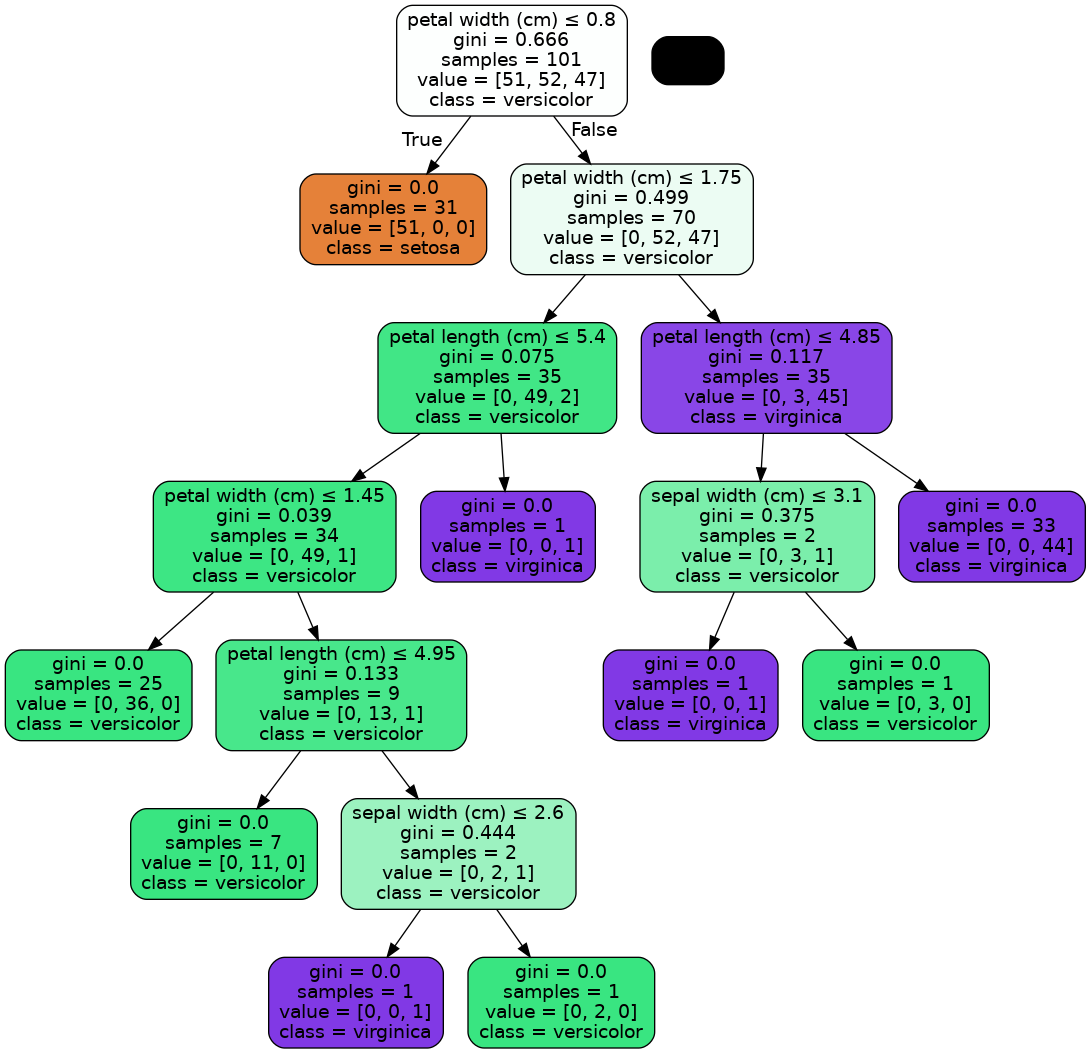

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# cargar los datos
iris = load_iris()
X = iris.data
y = iris.target

# crear el modelo de bosque aleatorio
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X, y)

# exportar el árbol de decisión
dot_data = export_graphviz(rfc.estimators_[0], out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# mostrar el árbol de decisión
Image(graph.create_png())

En este ejemplo, estamos creando un modelo de bosque aleatorio con 10 estimadores y usando el conjunto de datos Iris. Después de ajustar el modelo, estamos exportando el primer árbol de decisión del bosque utilizando la función ```export_graphviz```. Luego, utilizamos pydotplus para crear una imagen del árbol y ```IPython.display.Image``` para mostrar la imagen en la libreta.

| **Inicio** | **atrás 13** | **Siguiente 15** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./13.Arboles%20_Decision.ipynb)| [⏩](./15.DBSCAN_Clustering.ipynb)|